<a href="https://colab.research.google.com/github/antonellafontanetto/Achivos_Extras/blob/main/Modelo_no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 4x4 YPF - Primer pilar Vaca Muerta**

En esta etapa del proyecto 4x4, se aplicaron técnicas de Machine Learning no supervisado con el objetivo de explorar patrones ocultos en los datos energéticos sin necesidad de contar con una variable objetivo definida. El análisis se centró en identificar agrupamientos naturales entre las variables de producción de petróleo y  producción de gas de YPF en Vaca Muerta. Esto permitió observar cómo se comportan los distintos años en función de estos indicadores clave, y detectar posibles trayectorias de desarrollo o períodos atípicos en el cumplimiento del plan.

Se utilizaron algoritmos como K-means, TimeSeriesK-means y DBSCAN para realizar el análisis de clústeres, luego se aplico una reducción de dimensionalidad con PCA para facilitar la visualización y mejorar la eficiencia del modelo. El modelo K-means permitió identificar segmentos diferenciados de años con comportamientos similares, evaluando la cohesión de los grupos mediante el coeficiente de Silhouette. Por otro lado, DBSCAN ofreció una perspectiva alternativa más robusta frente a posibles valores atípicos y permitió detectar densidades inusuales que podrían reflejar cambios estructurales en la producción o en la estrategia comercial de la empresa.

Estos resultados complementan el análisis supervisado y las proyecciones realizadas previamente con modelos como Prophet, y ofrecen una herramienta exploratoria poderosa para segmentar períodos históricos, evaluar el impacto de decisiones estratégicas y anticipar posibles escenarios futuros. Este enfoque no supervisado aporta valor al proyecto 4x4 al permitir entender mejor la evolución de los indicadores clave sin imponer supuestos previos, favoreciendo así una mirada más abierta y data-driven del crecimiento de YPF en la Cuenca Neuquina.

### Importamos las libbrerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Cargamos el dataset

In [2]:
#Cargamos el dataset transformado en la segunda pre-entrega pero con los datos agrupados mensualmente
Produccion_ypf = pd.read_csv('/content/prod_encoded_df (2).csv')

#Aplicamos la función head() para visualizar las primeras 5 observaciones del dataset
Produccion_ypf.head().astype(int)

,Tipo de pozo_Gasífero,Tipo de pozo_Inyección de Agua,Tipo de pozo_Otro tipo,Tipo de pozo_Petrolífero,Tipo de pozo_Sumidero,Tipo de recurso_NO CONVENCIONAL,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_AGUADA DEL CHAÑAR,...,Area de permiso de concesion_NARAMBUENA,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Produccion de Petroleo,Produccion de Gas,Año,Mes
0,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,555,18699,2021,1
1,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,472,14314,2021,2
2,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1082,19413,2021,3
3,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,678,20456,2021,4
4,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,2594,25454,2021,5


### Columnas a eliminar

In [3]:
#Creamos una copia del dataset original
Produccion_ypf_copia2 = Produccion_ypf.copy()

columnas_a_eliminar = [
    'Tipo de pozo_Inyección de Agua',
    'Tipo de pozo_Otro tipo',
    'Tipo de pozo_Sumidero',
    'Tipo de recurso_NO CONVENCIONAL',
    'Producción de agua',
    'Area de permiso de concesion_AGUADA DEL CHAÑAR',
    'Area de permiso de concesion_AL NORTE DE LA DORSAL',
    'Area de permiso de concesion_BAJO DEL TORO',
    'Area de permiso de concesion_CERRO ARENA ',
    'Area de permiso de concesion_CERRO LAS MINAS ',
    'Area de permiso de concesion_CERRO MANRIQUE',
    'Area de permiso de concesion_CHIHUIDO DE LA SIERRA NEGRA',
    'Area de permiso de concesion_CN VII A',
    'Area de permiso de concesion_DADIN',
    'Area de permiso de concesion_BAJO DEL TORO NORTE',
    'Area de permiso de concesion_ESTACION FERNANDEZ ORO',
    'Area de permiso de concesion_FILO MORADO',
    'Area de permiso de concesion_LA ANGOSTURA SUR I',
    'Area de permiso de concesion_LA ANGOSTURA SUR II',
    'Area de permiso de concesion_LA RIBERA BLOQUE I',
    'Area de permiso de concesion_LA RIBERA BLOQUE II',
    'Area de permiso de concesion_LAS TACANAS'
]

#Con la función drop eliminamos las columnas que consideramos que no son necesarias para el análisis, en este caso solo dejamos las principales áreas de permiso de concesión por producción de petróleo y gas
Produccion_ypf = Produccion_ypf.drop(columns=columnas_a_eliminar, errors='ignore')

Produccion_ypf.head()

,Tipo de pozo_Gasífero,Tipo de pozo_Petrolífero,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_BAJO DEL TORO,Area de permiso de concesion_BANDURRIA SUR,Area de permiso de concesion_EL OREJANO,Area de permiso de concesion_LA AMARGA CHICA,Area de permiso de concesion_LA RIBERA BLOQUE I,...,Area de permiso de concesion_NARAMBUENA,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Produccion de Petroleo,Produccion de Gas,Año,Mes
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,555.0,18699.0,2021.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,472.0,14314.0,2021.0,2.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1082.0,19413.0,2021.0,3.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,678.0,20456.0,2021.0,4.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2594.0,25454.0,2021.0,5.0


## **Clustering**

## **K-Means**

El algoritmo K-Means es un modelo de aprendizaje no supervisado que se utiliza para identificar grupos o patrones ocultos dentro de un conjunto de datos sin necesidad de etiquetas previas.

Su objetivo es dividir los datos en k clústeres distintos, de manera que los puntos dentro de cada clúster sean lo más similares entre sí posible (alta cohesión), y lo más distintos de los otros grupos (alta separación).

Esto se logra asignando cada observación al clúster con el centroide más cercano, y actualizando esos centroides de forma iterativa hasta alcanzar la convergencia.

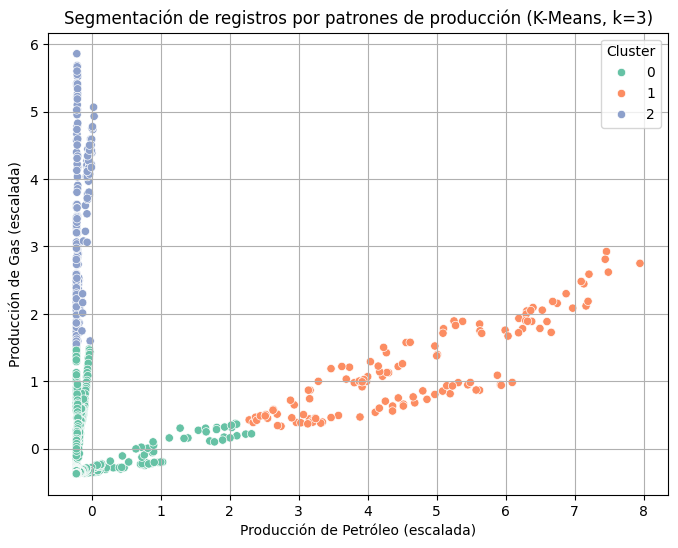

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar variables numéricas
X = Produccion_ypf[['Produccion de Petroleo', 'Produccion de Gas']].dropna()

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Visualizar
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='Set2')
plt.xlabel('Producción de Petróleo (escalada)')
plt.ylabel('Producción de Gas (escalada)')
plt.title('Segmentación de registros por patrones de producción (K-Means, k=3)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

El gráfico muestra la segmentación de registros de producción de petróleo y gas utilizando K-Means con k=3. Cada punto representa un registro escalado y fue agrupado según patrones de producción. Se identifican tres clústeres diferenciados: uno con alta producción de petróleo, otro con alta producción de gas, y un tercero con niveles bajos en ambos recursos.

### Silhouette Score

El Silhouette Score describe qué tan bien separadas y cohesionadas están las agrupaciones (clústeres) generadas por un algoritmo de clustering, como K-Means o TimeSeriesKMeans.

In [5]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {sil_score:.3f}")


Silhouette Score: 0.900


El Silhouette Score obtenido fue de 0.900, lo que indica una excelente calidad de agrupamiento. Las series temporales fueron correctamente agrupadas con alta cohesión interna y buena separación entre clústeres, validando la efectividad del modelo no supervisado aplicado.

### Inertia (Suma de errores cuadrados dentro del clúster)

In [6]:
print(f"Inercia (SSE): {kmeans.inertia_:.2f}")


Inercia (SSE): 945.01


La inercia (SSE) obtenida fue de 945.01, lo que representa la suma total de las distancias entre cada serie temporal y el centroide de su clúster. Un valor más bajo de inercia indica que las series dentro de cada clúster están más agrupadas entre sí, lo que refuerza la calidad del agrupamiento logrado.

### Davies-Bouldin Index (mide la separación entre clústeres: más bajo = mejor)

In [7]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(X_scaled, labels)
print(f"Davies-Bouldin Index: {db_index:.3f}")


Davies-Bouldin Index: 0.413


El Davies-Bouldin Index obtenido fue de 0.413, lo que indica una buena separación entre clústeres. Este índice mide la relación entre la dispersión dentro de los clústeres y la distancia entre ellos, donde valores más bajos reflejan mejor calidad de agrupamiento.

### Gráfico Silhouette

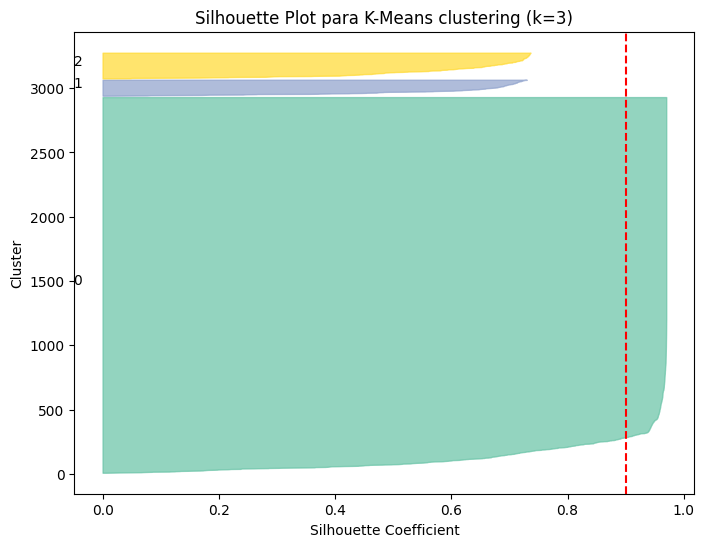

In [8]:
from sklearn.metrics import silhouette_samples
import numpy as np

silhouette_vals = silhouette_samples(X_scaled, labels)

plt.figure(figsize=(8,6))
y_lower = 10
for i in range(3):  # 3 clusters
    ith_cluster_silhouette_vals = silhouette_vals[labels == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster

    color = plt.cm.Set2(i / 3)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster, str(i))
    y_lower = y_upper + 10  # 10 for spacing between clusters

plt.axvline(x=silhouette_score(X_scaled, labels), color="red", linestyle="--")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.title("Silhouette Plot para K-Means clustering (k=3)")
plt.show()


El gráfico de silueta permite evaluar la calidad del agrupamiento con K-Means (k=3). La mayoría de los registros presenta coeficientes cercanos a 1, lo que indica que están correctamente asignados a sus clústeres. La línea roja marca el Silhouette Score promedio, que en este caso refleja una excelente separación entre grupos.

### Método Elbow






El método del codo es una técnica gráfica que ayuda a determinar el número óptimo de clústeres (k) en un modelo de agrupamiento. Consiste en calcular la inercia (SSE: suma de errores al cuadrado) para distintos valores de k y graficarlos. A medida que se incrementa k, la inercia disminuye, ya que los clústeres son más pequeños y mejor ajustados.

El "codo" del gráfico aparece en el punto donde la reducción de inercia comienza a ser menos pronunciada, lo cual indica que aumentar el número de clústeres deja de aportar mejoras significativas. Este punto se interpreta como el número óptimo de clústeres a utilizar.

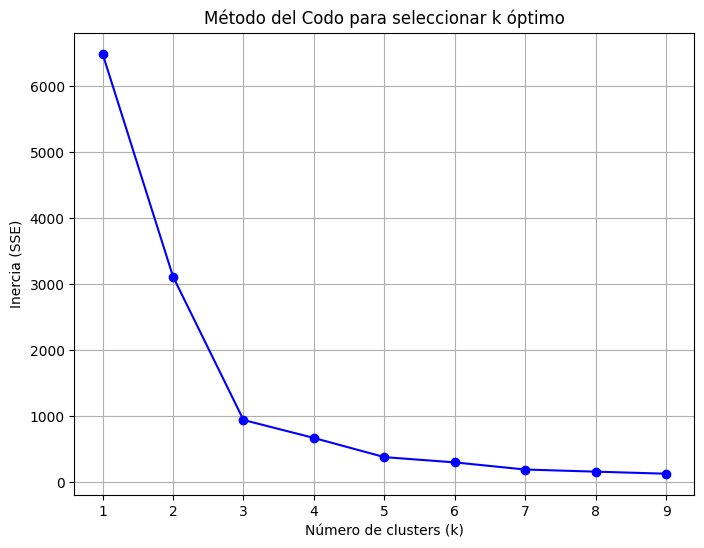

In [9]:
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia (SSE)')
plt.title('Método del Codo para seleccionar k óptimo')
plt.grid(True)
plt.show()


El gráfico muestra la variación de la inercia (SSE) según el número de clústeres. Se observa un punto de inflexión en k=3, lo que sugiere que tres clústeres es una elección adecuada para lograr un buen equilibrio entre simplicidad del modelo y cohesión interna de los grupos.

### Método Elbow con un rango más amplio

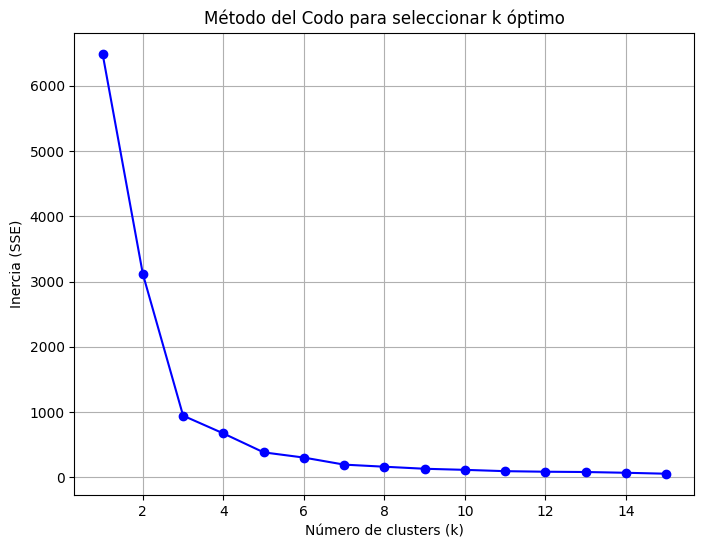

In [10]:
inertia = []
K = range(1, 16)  # De 1 a 15 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia (SSE)')
plt.title('Método del Codo para seleccionar k óptimo')
plt.grid(True)
plt.show()


## **TimeSeriesKMeans**


Time Series K-Means es una extensión del algoritmo K-Means tradicional, diseñada para agrupar series temporales en función de sus patrones de forma a lo largo del tiempo. A diferencia del K-Means clásico, que usa distancia euclídea y está orientado a datos estáticos, esta versión puede utilizar métricas especializadas como DTW (Dynamic Time Warping), que permite comparar series aunque estén desfasadas temporalmente.

El algoritmo agrupa las series en k clústeres minimizando la distancia entre cada serie y el "centroide" representativo de su grupo. Este enfoque es útil para identificar comportamientos o tendencias similares entre distintas unidades temporales (como años, meses o regiones) en contextos como producción energética, demanda, ventas, etc.

En este proyecto, se utilizó Time Series K-Means para segmentar series anuales de producción de petróleo y gas, permitiendo descubrir grupos con patrones de evolución similares a lo largo de los meses.

In [11]:
# Agrupar por Año y Mes sumando la producción
df_agrupado = Produccion_ypf.groupby(['Año', 'Mes'], as_index=False)[['Produccion de Petroleo', 'Produccion de Gas']].sum()

# Ahora sí pivotear
petroleo_pivot = df_agrupado.pivot(index='Año', columns='Mes', values='Produccion de Petroleo')
gas_pivot = df_agrupado.pivot(index='Año', columns='Mes', values='Produccion de Gas')


In [12]:
# Asegurar que los meses estén en orden correcto (1 al 12)
Produccion_ypf['Mes'] = pd.Categorical(Produccion_ypf['Mes'], categories=list(range(1,13)), ordered=True)

# Agrupar para evitar duplicados por Año y Mes
df_agrupado = Produccion_ypf.groupby(['Año', 'Mes'], as_index=False)[['Produccion de Petroleo', 'Produccion de Gas']].sum()

# Pivotear para petróleo
petroleo_pivot = df_agrupado.pivot(index='Año', columns='Mes', values='Produccion de Petroleo')

# Pivotear para gas
gas_pivot = df_agrupado.pivot(index='Año', columns='Mes', values='Produccion de Gas')


/tmp/ipython-input-12-3702145819.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado = Produccion_ypf.groupby(['Año', 'Mes'], as_index=False)[['Produccion de Petroleo', 'Produccion de Gas']].sum()


In [13]:
!pip install tslearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 6.7 MB/s eta 0:00:00


In [14]:
import numpy as np
from tslearn.preprocessing import TimeSeriesScalerMinMax

# Convertir a arrays 3D (n_series, n_timestamps, 1)
X_petroleo = petroleo_pivot.values[:, :, np.newaxis]
X_gas = gas_pivot.values[:, :, np.newaxis]

# Escalamos (opcional pero recomendable)
scaler = TimeSeriesScalerMinMax()
X_petroleo_scaled = scaler.fit_transform(X_petroleo)
X_gas_scaled = scaler.fit_transform(X_gas)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [29]:
from tslearn.clustering import TimeSeriesKMeans

model_petroleo = TimeSeriesKMeans(n_clusters=3, metric="dtw", random_state=0)
labels_petroleo = model_petroleo.fit_predict(X_petroleo_scaled)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [30]:
model_gas = TimeSeriesKMeans(n_clusters=5, metric="dtw", random_state=0)
labels_gas = model_gas.fit_predict(X_gas_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### Patrones promedio de producción de petróleo por clúster (Time Series K-Means, k=5)

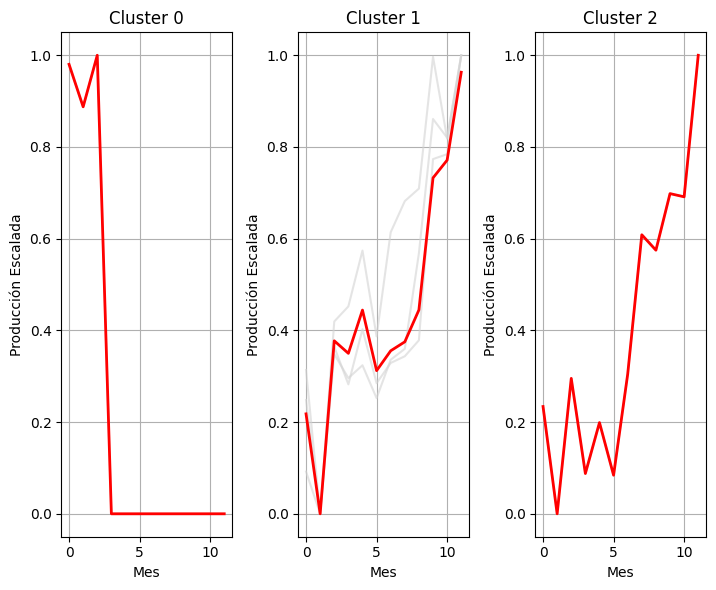

In [32]:
import matplotlib.pyplot as plt

# Graficar los clústeres
plt.figure(figsize=(12, 6))

for cluster in range(3):
    plt.subplot(1, 5, cluster + 1)
    for i, serie in enumerate(X_petroleo_scaled[labels_petroleo == cluster]):
        plt.plot(serie.ravel(), color="lightgray", alpha=0.6)
    plt.plot(model_petroleo.cluster_centers_[cluster].ravel(), color="red", linewidth=2)
    plt.title(f"Cluster {cluster}")
    plt.xlabel("Mes")
    plt.ylabel("Producción Escalada")
    plt.grid(True)

plt.tight_layout()
plt.show()


El gráfico muestra los centroides representativos de cada clúster generados por Time Series K-Means sobre la producción mensual escalada de petróleo. Cada curva resume el patrón promedio de un grupo de series anuales, permitiendo identificar distintos comportamientos de producción a lo largo del tiempo.

### Patrones promedio de producción de gas por clúster (Time Series K-Means, k=5)

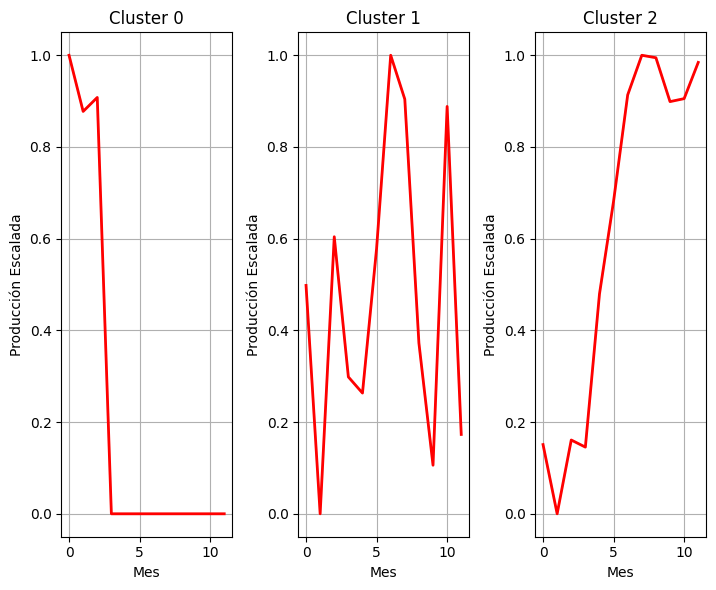

In [33]:
import matplotlib.pyplot as plt

# Graficar los clústeres
plt.figure(figsize=(12, 6))

for cluster in range(3):
    plt.subplot(1, 5, cluster + 1)
    for i, serie in enumerate(X_gas_scaled[labels_gas == cluster]):
        plt.plot(serie.ravel(), color="lightgray", alpha=0.6)
    plt.plot(model_gas.cluster_centers_[cluster].ravel(), color="red", linewidth=2)
    plt.title(f"Cluster {cluster}")
    plt.xlabel("Mes")
    plt.ylabel("Producción Escalada")
    plt.grid(True)

plt.tight_layout()
plt.show()

### Método Silhouette

In [19]:
from sklearn.metrics import silhouette_score
from tslearn.metrics import cdist_dtw

# Matriz de distancias DTW entre todas las series
distance_matrix = cdist_dtw(X_scaled)

# Silhouette Score con precomputed distances
sil_score = silhouette_score(distance_matrix, labels, metric="precomputed")
print(f"Silhouette Score (DTW): {sil_score:.3f}")


Silhouette Score (DTW): 0.900


El modelo Time Series K-Means alcanzó un Silhouette Score (DTW) de 0.900, lo que indica una excelente calidad de agrupamiento. Este valor sugiere que las series temporales de producción fueron agrupadas con alta cohesión interna y buena separación entre clústeres, validando la eficacia del uso de DTW como métrica de similitud.



In [34]:
n_clusters = 3  # el número de clusters


### Patrones promedio de producción de petróleo por clúster (Time Series K-Means, k=3)

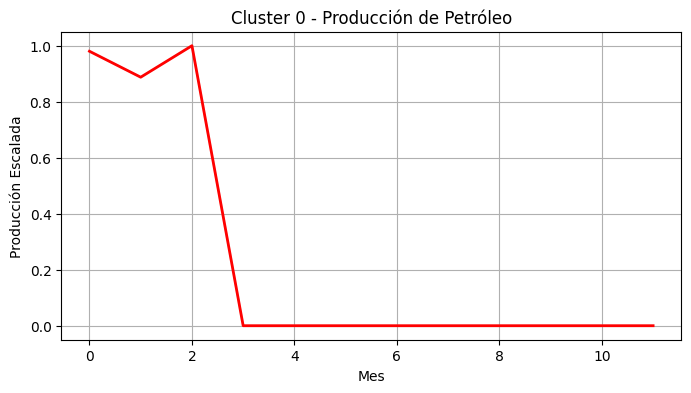

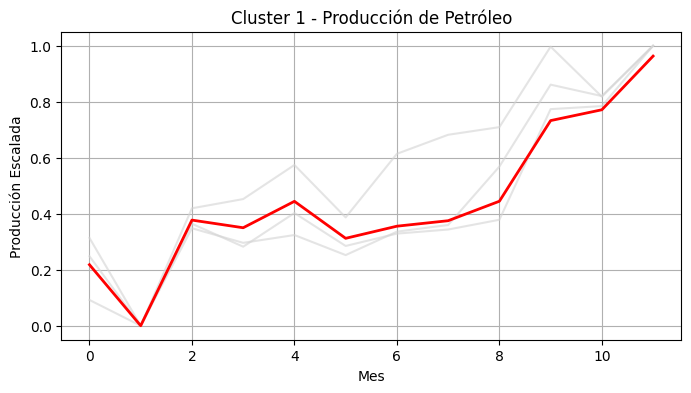

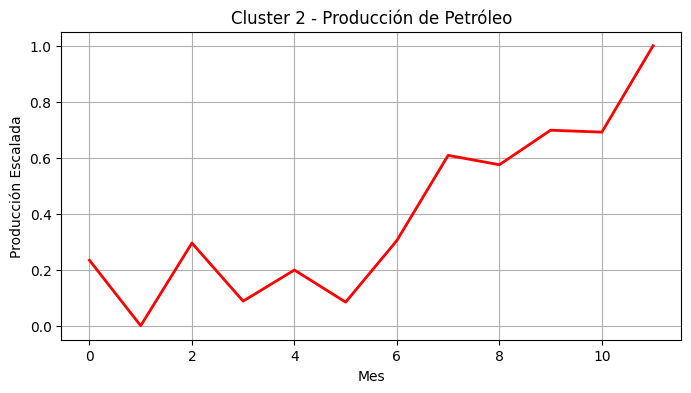

In [35]:
for cluster in range(n_clusters):
    plt.figure(figsize=(8,4))
    for serie in X_petroleo_scaled[labels_petroleo == cluster]:
        plt.plot(serie.ravel(), color="lightgray", alpha=0.6)
    plt.plot(model_petroleo.cluster_centers_[cluster].ravel(), color="red", linewidth=2)
    plt.title(f"Cluster {cluster} - Producción de Petróleo")
    plt.xlabel("Mes")
    plt.ylabel("Producción Escalada")
    plt.grid(True)
    plt.show()


### Patrones promedio de producción de gas por clúster (Time Series K-Means, k=3)

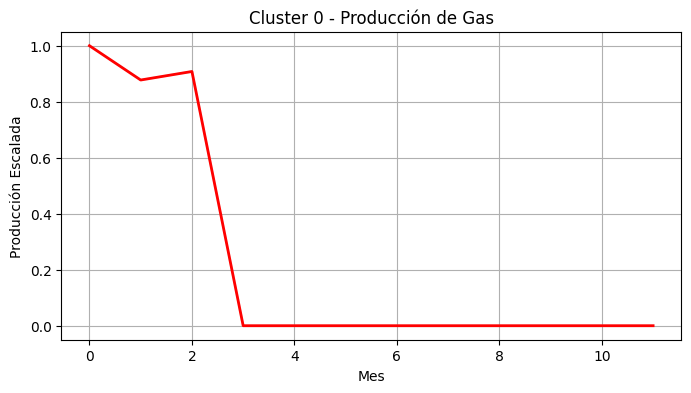

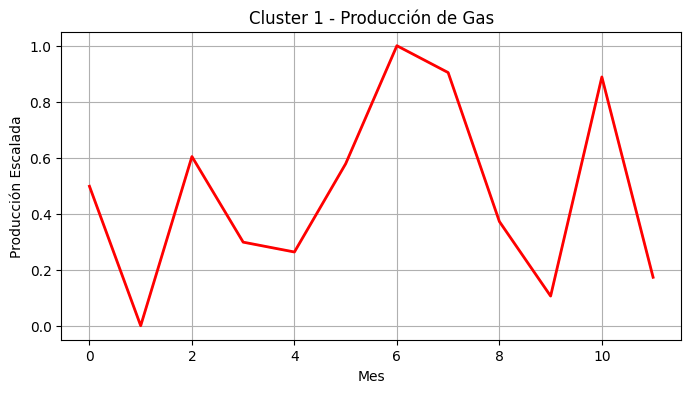

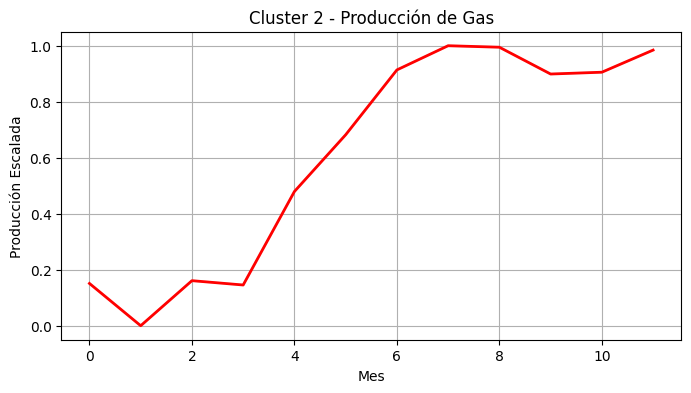

In [36]:
for cluster in range(n_clusters):
    plt.figure(figsize=(8,4))
    for serie in X_gas_scaled[labels_gas == cluster]:
        plt.plot(serie.ravel(), color="lightgray", alpha=0.6)
    plt.plot(model_gas.cluster_centers_[cluster].ravel(), color="red", linewidth=2)
    plt.title(f"Cluster {cluster} - Producción de Gas")
    plt.xlabel("Mes")
    plt.ylabel("Producción Escalada")
    plt.grid(True)
    plt.show()

In [37]:
import numpy as np

labels_petroleo = np.array(labels_petroleo)

unique_labels, counts = np.unique(labels_petroleo, return_counts=True)

print("📊 Distribución de observaciones por cluster:")
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} observaciones")


📊 Distribución de observaciones por cluster:
Cluster 0: 1 observaciones
Cluster 1: 3 observaciones
Cluster 2: 1 observaciones


## **DBSCAN**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de clustering que agrupa puntos cercanos según una densidad mínima, identificando regiones densas como clusters y marcando puntos aislados como ruido o outliers. No requiere definir el número de clusters previamente y es especialmente útil para descubrir formas arbitrarias en los datos.

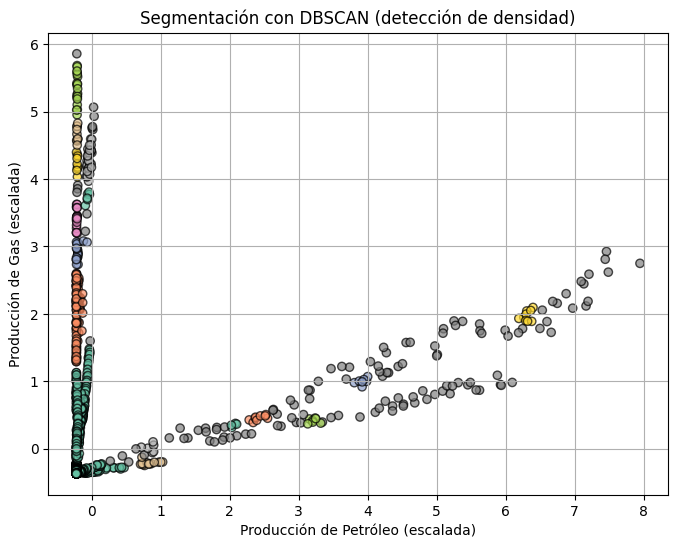

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Seleccionar variables numéricas
X = Produccion_ypf[['Produccion de Petroleo', 'Produccion de Gas']].dropna()

# 2. Escalar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Aplicar DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=4)  # Podés ajustar estos valores
labels = dbscan.fit_predict(X_scaled)

# 4. Crear DataFrame para graficar
df_dbscan = pd.DataFrame(X_scaled, columns=['Petróleo (escalado)', 'Gas (escalado)'])
df_dbscan['Cluster'] = labels

# 5. Visualizar
plt.figure(figsize=(8,6))
palette = sns.color_palette('Set2', n_colors=len(set(labels)) - (1 if -1 in labels else 0))
colors = [palette[label] if label != -1 else (0.5, 0.5, 0.5) for label in labels]  # gris para ruido

plt.scatter(df_dbscan['Petróleo (escalado)'], df_dbscan['Gas (escalado)'], c=colors, alpha=0.7, edgecolor='k')
plt.title('Segmentación con DBSCAN (detección de densidad)')
plt.xlabel('Producción de Petróleo (escalada)')
plt.ylabel('Producción de Gas (escalada)')
plt.grid(True)
plt.show()


### k-dist plot

Para elegir un buen valor de eps en DBSCAN, se usa un gráfico llamado k-dist plot, que muestra la distancia al vecino k-ésimo más cercano para cada punto. Donde el gráfico hace “codo” es un buen candidato para eps.

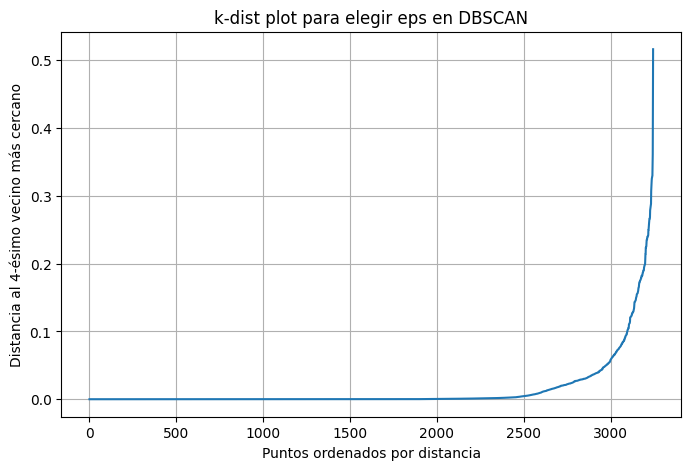

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Parámetros
k = 4  # usualmente min_samples

# Calcular distancias a k-ésimo vecino más cercano
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Tomar la distancia al vecino k-ésimo para cada punto
k_distances = np.sort(distances[:, k-1])

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.ylabel(f'Distancia al {k}-ésimo vecino más cercano')
plt.xlabel('Puntos ordenados por distancia')
plt.title('k-dist plot para elegir eps en DBSCAN')
plt.grid(True)
plt.show()


### Número de clusters detectados

In [41]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters: {n_clusters}")
print(f"Número de outliers: {n_noise}")


Número de clusters: 17
Número de outliers: 128


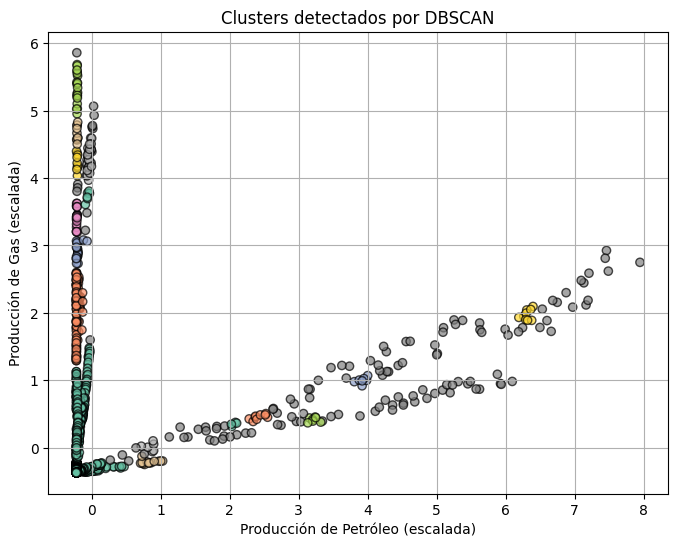

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Supongamos que ya tenés X_scaled y labels del DBSCAN
df_clusters = pd.DataFrame(X_scaled, columns=['Petróleo (escalado)', 'Gas (escalado)'])
df_clusters['Cluster'] = labels

# Palette con colores para cada cluster excepto el ruido (-1)
palette = sns.color_palette('Set2', n_colors=len(set(labels)) - (1 if -1 in labels else 0))

# Asignar color: clusters a colores, ruido a gris
colors = [palette[label] if label != -1 else (0.5, 0.5, 0.5) for label in labels]

plt.figure(figsize=(8,6))
plt.scatter(df_clusters['Petróleo (escalado)'], df_clusters['Gas (escalado)'],
            c=colors, alpha=0.7, edgecolor='k')

plt.title('Clusters detectados por DBSCAN')
plt.xlabel('Producción de Petróleo (escalada)')
plt.ylabel('Producción de Gas (escalada)')
plt.grid(True)
plt.show()


## **MeanShift**

MeanShift es un algoritmo de clustering no paramétrico que encuentra grupos (clusters) en los datos sin necesidad de especificar cuántos clusters buscar de antemano. Funciona buscando modos de densidad en el espacio de características, es decir, regiones donde los datos están más concentrados.

El algoritmo:

* Coloca una "ventana" o kernel en cada punto de datos.

* Calcula el centro de masa (media) dentro de esa ventana.

* Desplaza la ventana hacia esa media.

* Repite este proceso hasta que converge (cuando la ventana ya no se mueve mucho).

Los puntos que convergen cerca se agrupan en un mismo cluster.

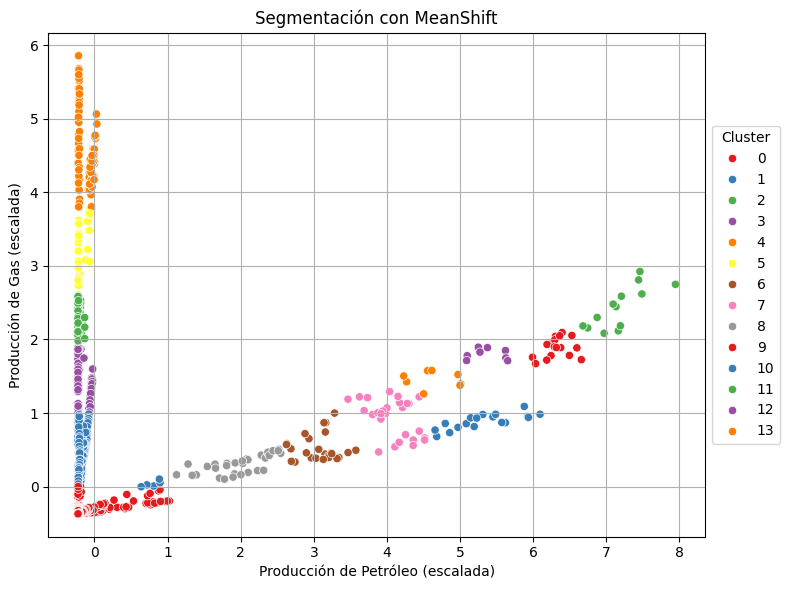

In [54]:
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Escalar datos (si ya lo hiciste, podés omitirlo)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar MeanShift
meanshift = MeanShift()
labels_ms = meanshift.fit_predict(X_scaled)

# Visualizar
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels_ms, palette='Set1')

plt.xlabel('Producción de Petróleo (escalada)')
plt.ylabel('Producción de Gas (escalada)')
plt.title('Segmentación con MeanShift')

# Leyenda a la derecha fuera del gráfico
plt.legend(title='Cluster', loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(True)
plt.tight_layout()  # Ajusta layout para que no se corte nada
plt.show()


### Número de clusters encontrados

In [44]:
n_clusters = len(set(labels_ms))
print(f"Número de clusters: {n_clusters}")


Número de clusters: 14


### Silhouette Score

In [55]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, labels_ms)
print(f'Silhouette Score: {score:.3f}')


Silhouette Score: 0.864


**Silhouette Score:** El modelo MeanShift alcanzó un Silhouette Score de **0.864**, lo que indica una segmentación **excelente**, con clusters bien separados entre sí y observaciones bien agrupadas internamente.


### Calinski-Harabasz Index (Variance Ratio Criterion)

In [56]:
from sklearn.metrics import calinski_harabasz_score

ch_score = calinski_harabasz_score(X_scaled, labels_ms)
print(f'Calinski-Harabasz Score: {ch_score:.3f}')


Calinski-Harabasz Score: 16180.605


**Calinski-Harabasz Score:** El modelo obtuvo un valor de **16180.605**, lo que indica una **buena calidad de agrupamiento**. Valores altos reflejan clusters bien separados y compactos, lo que refuerza la validez del resultado del modelo MeanShift.


### Davies-Bouldin Index

In [57]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(X_scaled, labels_ms)
print(f'Davies-Bouldin Score: {db_score:.3f}')


Davies-Bouldin Score: 0.593


**Davies-Bouldin Score:** El valor obtenido fue de **0.593**, lo cual indica una **buena separación entre clusters**. En esta métrica, cuanto más bajo es el valor, mejor es la definición del agrupamiento.


### Centroides de clusters (media de cada cluster)

In [59]:
import numpy as np

for cluster in set(labels_ms):
    cluster_points = X_scaled[labels_ms == cluster]
    centroid = np.mean(cluster_points, axis=0)
    print(f"Cluster {cluster}: centroid {centroid}")


Cluster 0: centroid [-0.20798455 -0.3559832 ]
Cluster 1: centroid [-0.1511656   0.46667723]
Cluster 2: centroid [-0.20608811  2.27660354]
Cluster 3: centroid [-0.16880614  1.41368967]
Cluster 4: centroid [-0.12658745  4.61096593]
Cluster 5: centroid [-0.18735644  3.23842545]
Cluster 6: centroid [3.07072629 0.52729398]
Cluster 7: centroid [4.08020343 0.94096646]
Cluster 8: centroid [1.98315425 0.30093993]
Cluster 9: centroid [6.32552189 1.89009642]
Cluster 10: centroid [5.32743647 0.8886626 ]
Cluster 11: centroid [7.18486183 2.43481244]
Cluster 12: centroid [5.37343686 1.80227927]
Cluster 13: centroid [4.64424331 1.45502519]


In [63]:
import pandas as pd

df = pd.DataFrame(X_scaled, columns=['Petroleo', 'Gas'])
df['Cluster'] = labels_ms.astype(str)  # string para gráficos categóricos


### Dispersión con Seaborn

/tmp/ipython-input-64-1781602622.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


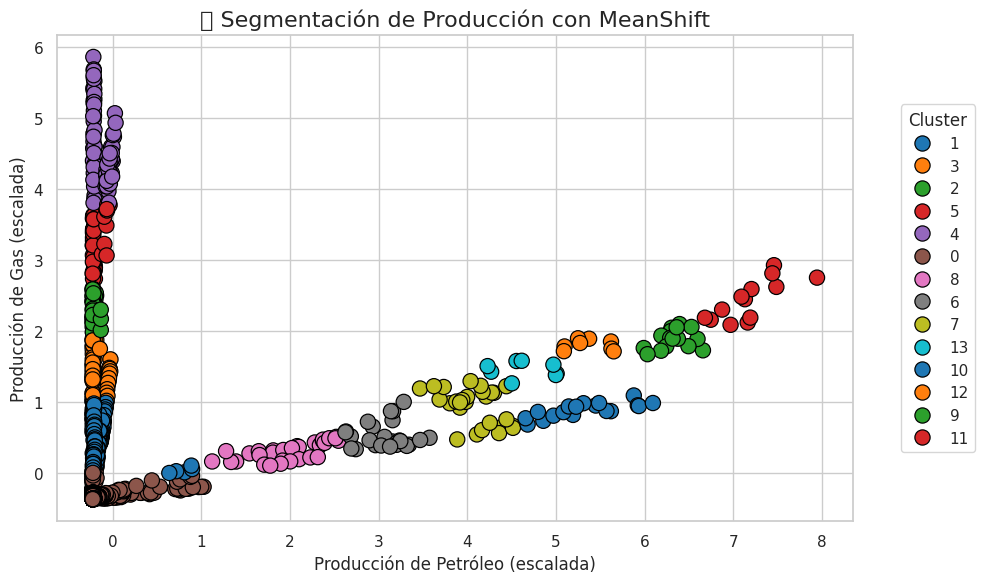

In [64]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.scatterplot(data=df, x='Petroleo', y='Gas', hue='Cluster', palette='tab10', s=120, edgecolor='black')
plt.title('📊 Segmentación de Producción con MeanShift', fontsize=16)
plt.xlabel('Producción de Petróleo (escalada)', fontsize=12)
plt.ylabel('Producción de Gas (escalada)', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.tight_layout()
plt.show()


**Descripción del gráfico:**  
El gráfico muestra la **segmentación de observaciones** en función de la **producción de petróleo y gas (escaladas)** utilizando el algoritmo **MeanShift**. Cada punto representa una observación, y los colores indican la asignación a diferentes clusters. Se observa una clara **separación de grupos** a lo largo de distintas combinaciones de producción, lo que refleja patrones diferenciados en el comportamiento energético.


### Boxplot de Producción por Cluster

/tmp/ipython-input-65-1210870126.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y='Petroleo', palette='Set3')


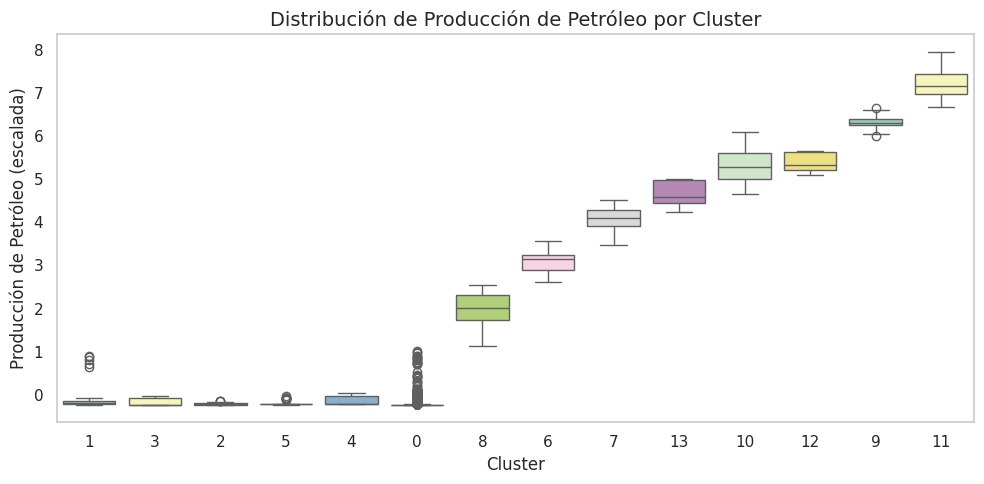

In [65]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Cluster', y='Petroleo', palette='Set3')
plt.title('Distribución de Producción de Petróleo por Cluster', fontsize=14)
plt.xlabel('Cluster')
plt.ylabel('Producción de Petróleo (escalada)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Descripción del gráfico:**  
El boxplot muestra la **distribución de la producción de petróleo (escalada)** por cada cluster identificado con MeanShift. Se observa una **clara diferenciación entre grupos**, con clusters de baja, media y alta producción. Esto confirma que el modelo logró segmentar adecuadamente las observaciones según sus niveles de producción.


/tmp/ipython-input-66-1290325284.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y='Gas', palette='Set2')


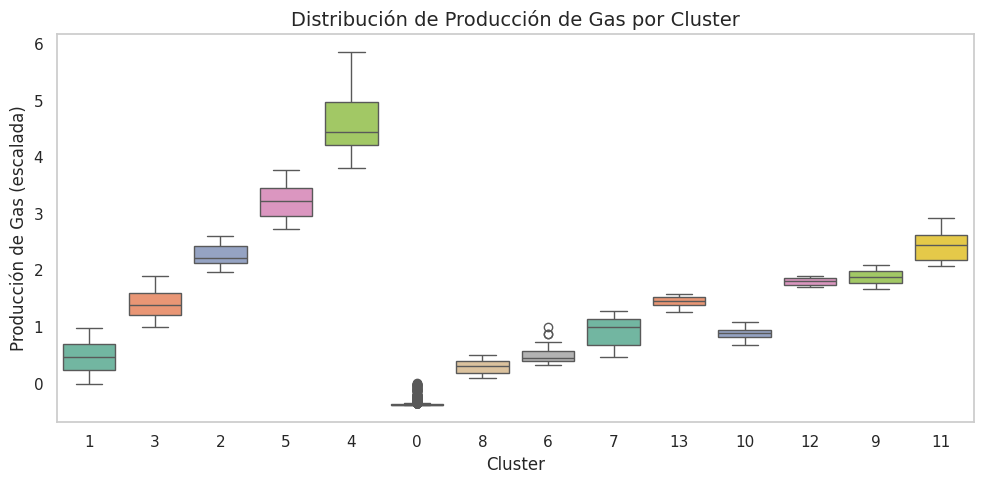

In [66]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Cluster', y='Gas', palette='Set2')
plt.title('Distribución de Producción de Gas por Cluster', fontsize=14)
plt.xlabel('Cluster')
plt.ylabel('Producción de Gas (escalada)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Descripción del gráfico:**  
Este boxplot muestra la **distribución de la producción de gas (escalada)** por cluster, según la segmentación obtenida con MeanShift. Se identifican grupos con **altos niveles de producción** (como el Cluster 4) y otros con producción significativamente **más baja** (como el Cluster 0), evidenciando una **heterogeneidad clara entre los clusters**.


### Conteo de observaciones por Cluster

/tmp/ipython-input-67-3320554080.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Cluster', palette='pastel', edgecolor='black')


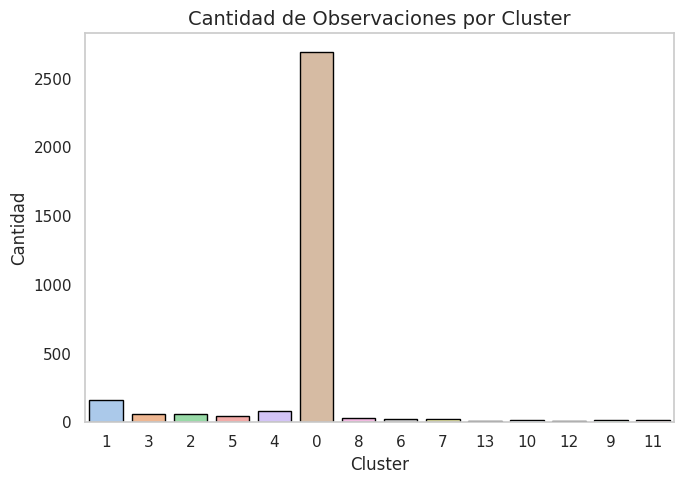

In [67]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Cluster', palette='pastel', edgecolor='black')
plt.title('Cantidad de Observaciones por Cluster', fontsize=14)
plt.xlabel('Cluster')
plt.ylabel('Cantidad')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Silhouette Score por Cluster

/tmp/ipython-input-69-3639147459.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Cluster', y='Silhouette', palette='coolwarm')


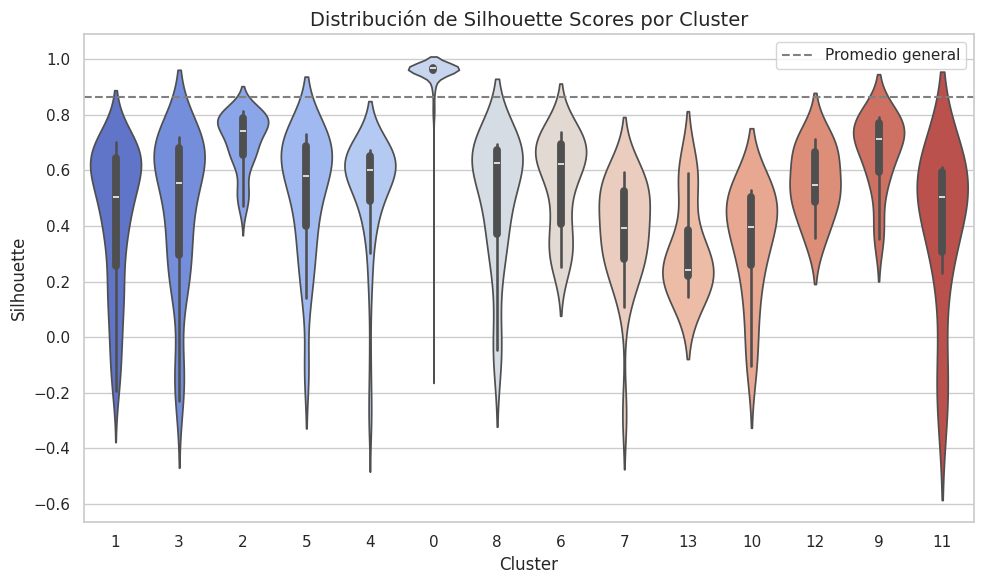

In [69]:
from sklearn.metrics import silhouette_samples

df['Silhouette'] = silhouette_samples(X_scaled, labels_ms)

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Cluster', y='Silhouette', palette='coolwarm')
plt.axhline(df['Silhouette'].mean(), color='gray', linestyle='--', label='Promedio general')
plt.title('Distribución de Silhouette Scores por Cluster', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


Este gráfico muestra la distribución de los Silhouette Scores por cluster generados con el algoritmo MeanShift. El Silhouette Score mide qué tan bien separadas y compactas están las observaciones dentro de cada cluster. Clusters con valores más altos y concentrados cerca de 1 indican una mejor segmentación, mientras que valores negativos o cercanos a cero pueden indicar observaciones mal agrupadas o fronterizas.

Basándonos en la imagen, podemos identificar qué clusters son más fiables y cuáles podrían ser problemáticos.

* **Clusters bien definidos**

Estos tienen la mayoría de sus puntos con Silhouette Scores altos (cercanos a 1) y con distribuciones compactas:

Cluster 2: Muy buenos scores (la mayoría > 0.75), muy concentrado.

Cluster 0: Solo tiene un punto (una línea delgada), pero el score es cercano a 1.0.

Cluster 9 y 12: Distribuciones altas, bien separadas.

Cluster 11: Score elevado y distribución simétrica.

Cluster 5 y 4: También tienen buena concentración y scores positivos.

Estos clusters son confiables y están bien separados del resto.


* **Clusters poco definidos o muy cercanos entre sí.**

Cluster 7 y 13: Tienen muchas observaciones con scores negativos, lo que sugiere mal agrupamiento.

Cluster 10: La mayoría de los puntos están entre 0 y 0.3, lo que indica baja cohesión.

Cluster 3: Presenta valores negativos también.

Cluster 8 y 6: Algunos scores negativos, aunque no tan preocupantes como 7 o 13.

Estos clusters pueden requerir revisión.

### Estimar automáticamente el bandwidth

In [70]:
from sklearn.cluster import estimate_bandwidth

# Estimar bandwidth con una fracción del total de datos (quantile = 0.2 es común)
bandwidth = estimate_bandwidth(X_scaled, quantile=0.2, n_samples=500)

print(f"Bandwidth estimado: {bandwidth:.3f}")

# Aplicar MeanShift con ese bandwidth
from sklearn.cluster import MeanShift

meanshift = MeanShift(bandwidth=bandwidth)
labels_ms = meanshift.fit_predict(X_scaled)

# Número de clusters nuevos
n_clusters = len(set(labels_ms))
print(f"Número de clusters encontrados: {n_clusters}")


Bandwidth estimado: 0.562
Número de clusters encontrados: 12


### Visualizar la nueva segmentación

/tmp/ipython-input-71-1299344392.py:16: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


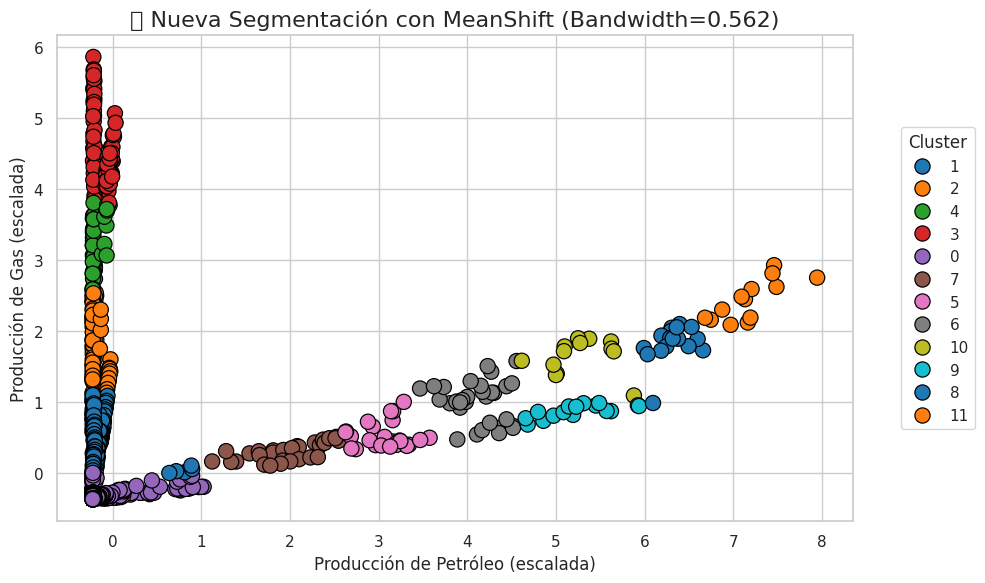

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear nuevo DataFrame con etiquetas
df = pd.DataFrame(X_scaled, columns=['Petroleo', 'Gas'])
df['Cluster'] = labels_ms.astype(str)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.scatterplot(data=df, x='Petroleo', y='Gas', hue='Cluster', palette='tab10', s=120, edgecolor='black')
plt.title('📊 Nueva Segmentación con MeanShift (Bandwidth=0.562)', fontsize=16)
plt.xlabel('Producción de Petróleo (escalada)', fontsize=12)
plt.ylabel('Producción de Gas (escalada)', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.tight_layout()
plt.show()


### Silhouette Score

In [72]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, labels_ms)
print(f"Silhouette Score con bandwidth=0.562: {score:.3f}")


Silhouette Score con bandwidth=0.562: 0.866


/tmp/ipython-input-73-225996833.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Cluster', y='Silhouette', palette='coolwarm')


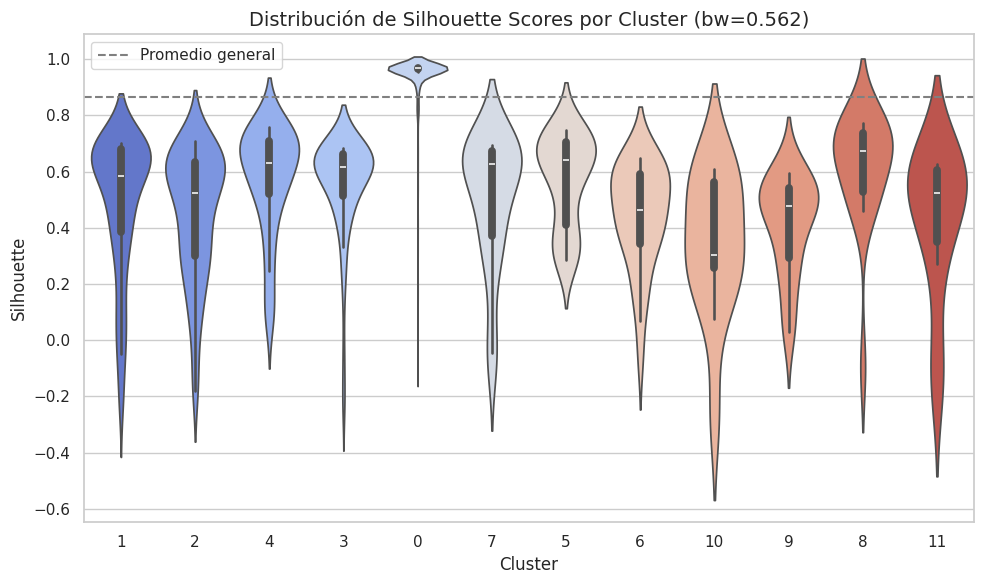

In [73]:
from sklearn.metrics import silhouette_samples

df['Silhouette'] = silhouette_samples(X_scaled, labels_ms)

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Cluster', y='Silhouette', palette='coolwarm')
plt.axhline(df['Silhouette'].mean(), color='gray', linestyle='--', label='Promedio general')
plt.title('Distribución de Silhouette Scores por Cluster (bw=0.562)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipython-input-76-1678103772.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y='Petroleo', palette='Set2')


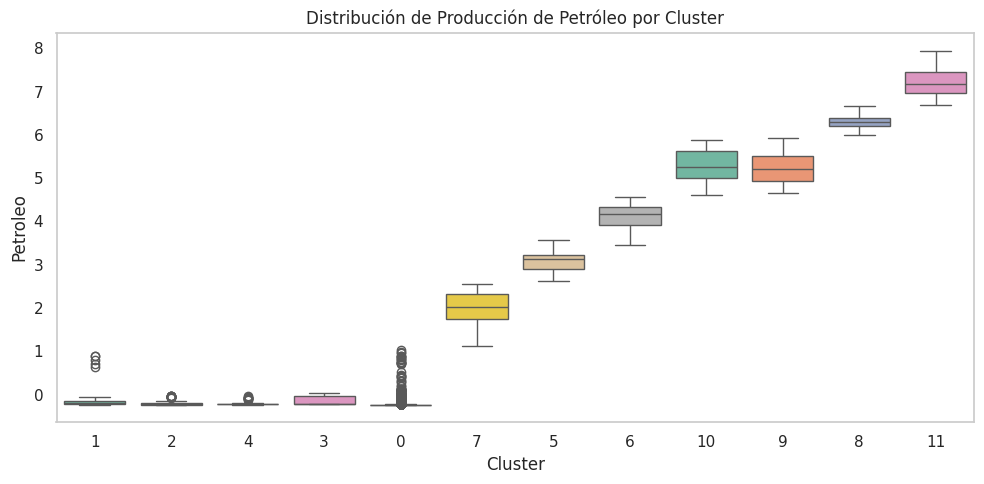

/tmp/ipython-input-76-1678103772.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y='Gas', palette='Set3')


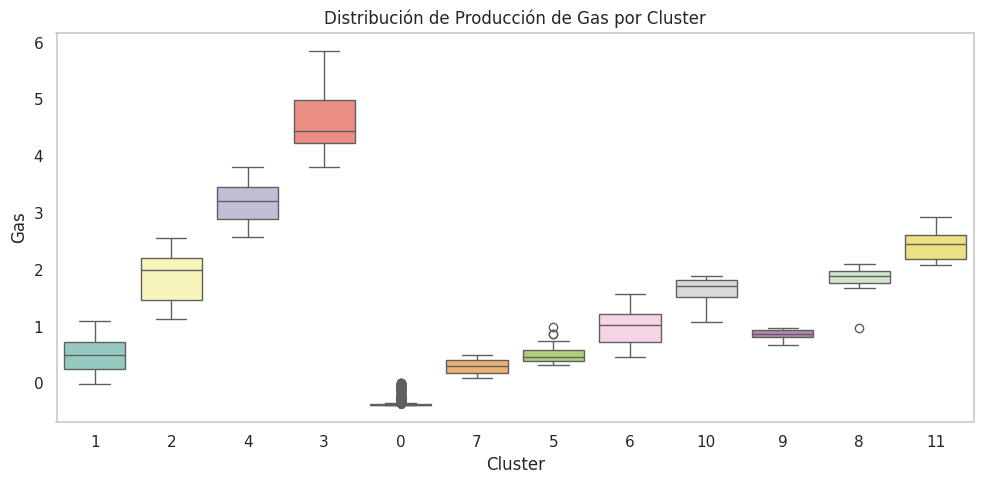

In [76]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Cluster', y='Petroleo', palette='Set2')
plt.title('Distribución de Producción de Petróleo por Cluster')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Cluster', y='Gas', palette='Set3')
plt.title('Distribución de Producción de Gas por Cluster')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Detectar los clusters más débiles

Clusters con menor Silhouette promedio:
Cluster
10    0.340768
9     0.409998
11    0.425605
6     0.441949
2     0.445081
Name: Silhouette, dtype: float64


/tmp/ipython-input-77-2938843082.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y='Silhouette', palette='coolwarm')


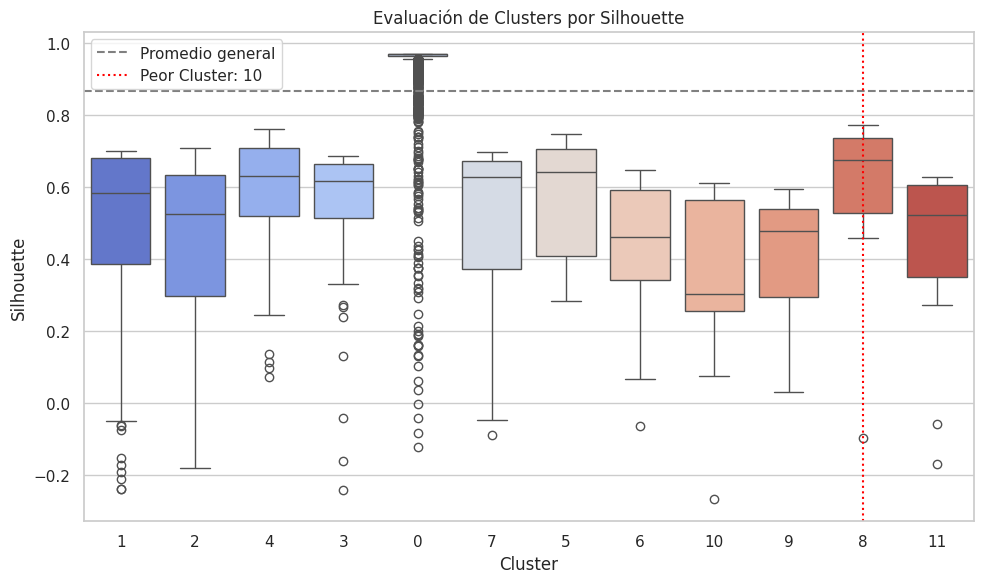

In [77]:
# Promedio por cluster
silhouette_promedios = df.groupby('Cluster')['Silhouette'].mean().sort_values()

print("Clusters con menor Silhouette promedio:")
print(silhouette_promedios.head())

# Destacar el peor cluster visualmente
cluster_peor = silhouette_promedios.idxmin()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Cluster', y='Silhouette', palette='coolwarm')
plt.title('Evaluación de Clusters por Silhouette')
plt.axhline(df['Silhouette'].mean(), color='gray', linestyle='--', label='Promedio general')
plt.axvline(int(cluster_peor), color='red', linestyle=':', label=f'Peor Cluster: {cluster_peor}')
plt.legend()
plt.tight_layout()
plt.show()


* Clusters 1, 2, 4, 3 y 0 tienen Silhouette Scores altos y medianas cercanas a 0.6–0.7, lo cual indica buena separación y cohesión interna. Son clusters bien definidos.

* Cluster 8 es interesante: tiene una mediana cercana a 0.7, pero muy pocos puntos, y algunos outliers bajos.

* Cluster 10 es el peor evaluado:

Tiene la mediana más baja (menor a 0.4).

Amplia dispersión de scores.

Muchos puntos están mal ubicados (algunos por debajo de 0).

Por eso fue marcado con la línea roja.

* Clusters 5, 6, 7 y 9 también tienen algo de dispersión, pero no tan graves como el 10.



Conclusión

La mayoría de los clusters tienen una segmentación adecuada, con buenos niveles de cohesión y separación. Sin embargo, el Cluster 10 muestra un rendimiento pobre, con baja calidad en la asignación de sus observaciones.